# 5.2 Lab: practice

Practice visualizing datasets in python or Tableau. This notebook is for python specifically.


### Load required packages

In [3]:
# Numeric and statistics packages:
import numpy as np
import scipy.stats as stats

# Pandas handles dataset loading and manipulation:
import pandas as pd

# import the plotting functions:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

# Initialize plotly notebook mode:
plotly.offline.init_notebook_mode()

# Setup matplotlib to display in notebook:
%matplotlib inline

## Load datasets with pandas

The datasets are in the assets/datasets folder. They are:

```
salary.csv
sales_info.csv
```
    
We have used these before. You should also load up the dataset we use in Project 1! Finding the path is up to you for these datasets for practice.

The pandas pattern for loading datasets is:

```python
salary = pd.read_csv({salary_csv_path})
```

You may want to rename the columns, especially for salary. The pattern for this would be:

```python
salary.columns = ['gender', 'professor_rank', 'years_in_job', 
                  'degree_level', 'years_since_degree', 'yearly_salary']
```
    
Which essentialy sets the columns to a list of strings. Pandas is pretty nice!

Use the ```.head()``` command on each DataFrame object to make sure that it looks ok.

Some plotting functions take arrays or lists, others take pandas DataFrame objects. It's up to you to look this up in the documentation to practice reading documentation for info on plotting. Getting arrays for columns out of a pandas DataFrame is:

```python
gender = salary.gender.values
```

As you can see, columns are also referenced easily with the .column syntax. They can also be accessed like:

```python
gender = salary[['gender']].values
```
    


## seaborn documentation

I highly recommend looking at the gallery section for examples!

- The website: https://stanford.edu/~mwaskom/software/seaborn/
- Check out the gallery of examples: https://stanford.edu/~mwaskom/software/seaborn/examples/index.html
- The API documentation has full info: https://stanford.edu/~mwaskom/software/seaborn/api.html

### 1. Load in your datasets with pandas and examine them.

In [99]:
salary_csv = '../assets/datasets/salary.csv'
sales_info_csv = '../assets/datasets/sales_info.csv'
project_csv = '../../projects/project-01/assets/sat_scores.csv'

project = pd.read_csv(project_csv)
salary = pd.read_csv(salary_csv)
sales_info = pd.read_csv(sales_info_csv)
salary.columns = ['gender', 'professor_rank', 'years_in_job',
                 'degree_level', 'years_since_degree', 'yearly_salary']

sales_info.columns = ['volume', 'margin', 'q1_2015', 'q1_2016']

verbal_scores = project.Verbal.values

yearly_salary = salary.yearly_salary.values
gender = salary.gender.values
years_in_job = salary.years_in_job.values
rank = salary.professor_rank.values

volume = sales_info.volume.values
margin = sales_info.margin.values
q1_2015 = sales_info.q1_2015.values
q1_2016 = sales_info.q1_2016.values

print verbal_scores

sales_info.head()

[509 499 511 495 520 501 500 511 506 510 501 508 493 491 499 486 482 526
 498 527 493 485 514 498 523 509 539 534 539 527 543 562 551 576 550 547
 561 580 577 559 562 567 577 564 584 562 575 593 577 592 566 506]


,volume,margin,q1_2015,q1_2016
0,18.420760,93.802281,337166.53,337804.05
1,4.776510,21.082425,22351.86,21736.63
2,16.602401,93.612494,277764.46,306942.27
3,4.296111,16.824704,16805.11,9307.75
4,8.156023,35.011457,54411.42,58939.90


### 2. Use a seaborn .pairplot() on variables from two of your three datasets.

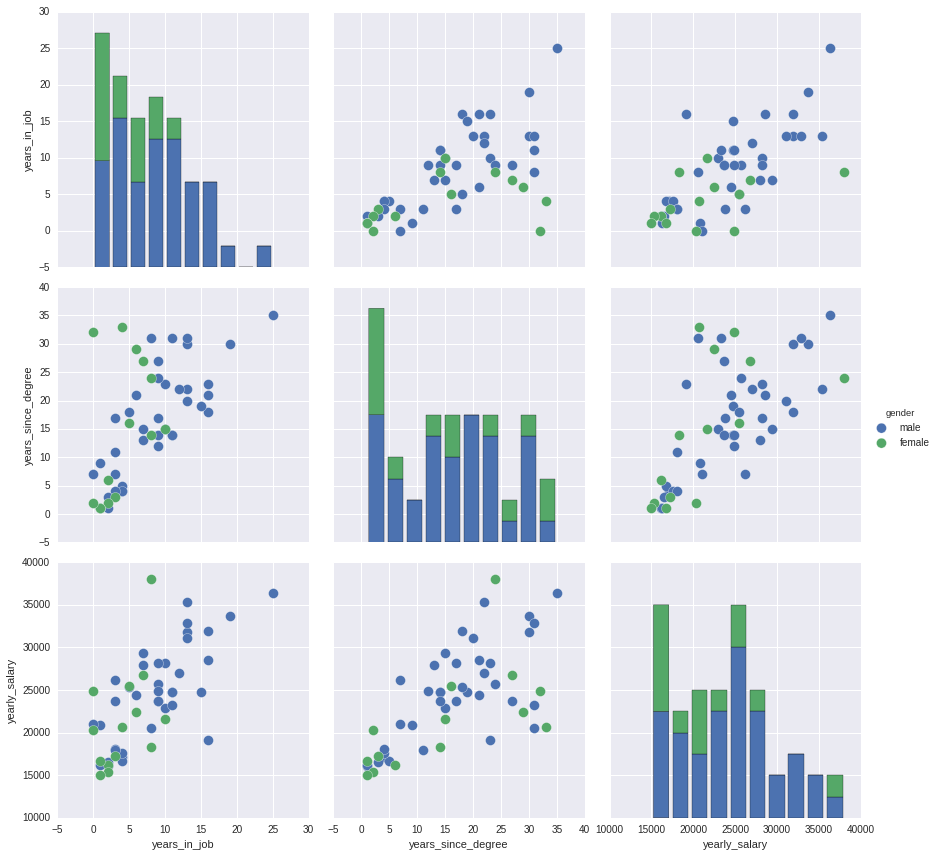

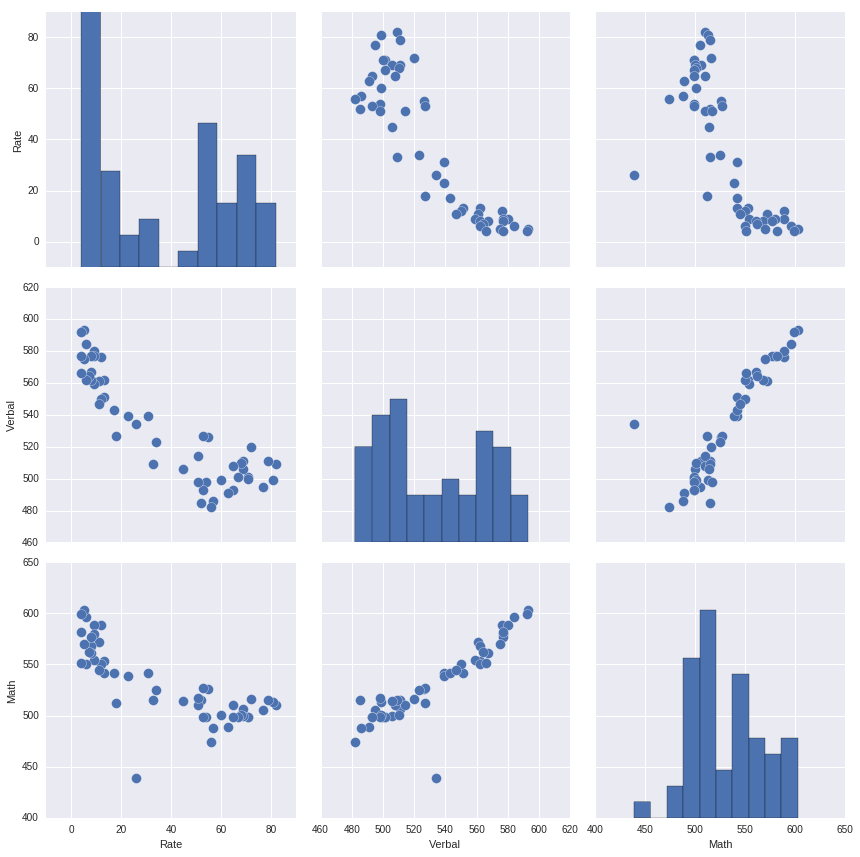

In [22]:
sns.pairplot(salary, hue = 'gender', size = 4, plot_kws = {'s': 100})

sns.pairplot(project, size = 4, plot_kws = {'s': 100})

### Use a seaborn .jointplot() on variables from two of your three datasets.

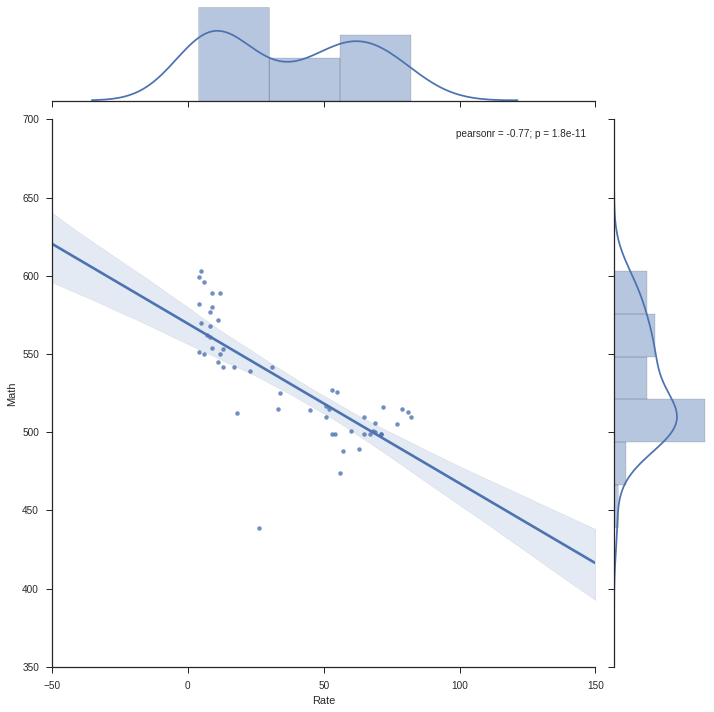

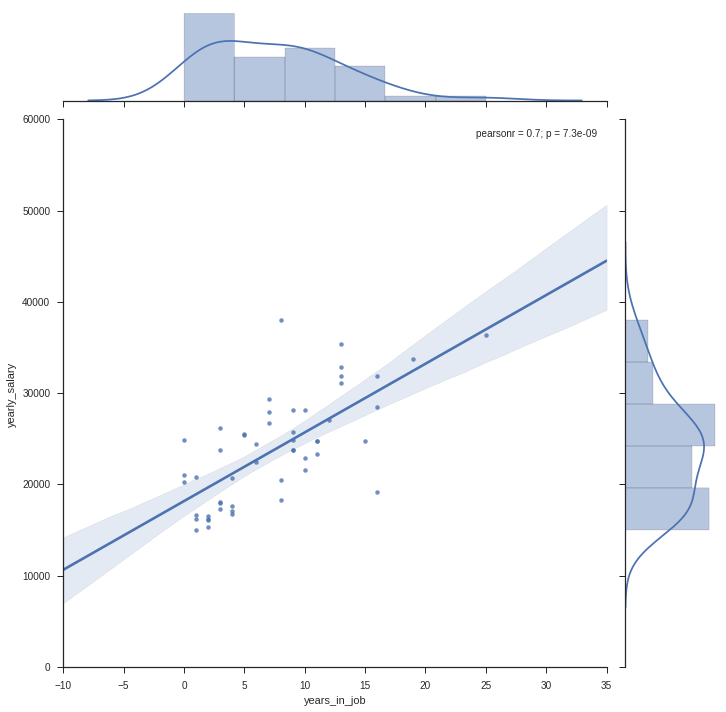

In [49]:
sns.set_style('ticks')
sns.jointplot('Rate', 'Math', project, kind = 'reg', size = 10)

sns.jointplot('years_in_job', 'yearly_salary', salary, kind = 'reg', size = 10)

### 3. Use a new seaborn function to plot variables from two of your three datasets.

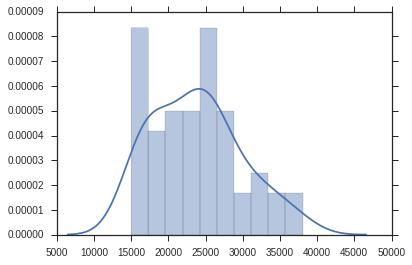

In [81]:
sns.distplot(yearly_salary, bins = 10)

## plotly

Check out the plotly documentation and look back on the code I wrote for a guide to the syntax. Don't worry if plotly isn't intuitive at first. It takes practice.

- website: https://plot.ly/
- documentation and examples for plotting in python: https://plot.ly/python/

### 4. Use a plotly scatterplot to plot variables from two of your three datasets.

In [100]:
import plotly.plotly as py
import plotly.graph_objs as go

sales_more_10 = go.Scatter(
    x = q1_2015[(volume > 10)],
    y = q1_2016[(volume > 10)],
    mode='markers',
    marker={'size':11,
            'line':{'width':0},
            'color':'steelblue',
            'symbol':"x",
            'opacity':0.65},
    name='Sales more than 10'
)

sales_less_10 = go.Scatter(
    x = q1_2015[(volume < 10)],
    y = q1_2016[(volume < 10)],
    mode='markers',
    marker={'size':11,
            'line':{'width':0},
            'color':'steelblue',
            'symbol':"square",
            'opacity':0.65},
    name='Sales less than 10'
)

data = [sales_more_10, sales_less_10]

layout = go.Layout(
    title='2015 Q1 Sales vs. 2016 Q1 Sales',
    hovermode='closest',
    xaxis={
        'title':'2015 Q1 Sales',
        'ticklen':5,
        'gridwidth':2,
    },
    yaxis={
        'title':'2016 Q1 Sales',
        'ticklen':5,
        'gridwidth':2,
    },
    height=600,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='2015 Q1 Sales vs. 2016 Q1 Sales')

### 5. [Optional] Try a new plotly function to plot variables from one of your datasets.

## Tableau

We didn't cover Tableau in the lesson, but you've seen it yesterday and you looked at the tutorials online. 

Load the datasets into Tableau.

## 6. Use Tableau to make a plot type of your choice for each of your datasets.